## Distribution

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
counts = pd.read_csv('counts-aso.csv')

NameError: name 'pd' is not defined

In [ ]:
# Calculate the total counts for each group
for i in range(2, 16):  # Use a comma instead of a colon in range
    total_counts = counts.iloc[:, i].sum()  # Access the sum of the i-th column
    column_name = counts.columns[i]  # Get the column name using correct syntax
    print(f'The total counts in {column_name} is {total_counts}')

The total counts in hek-gDNA1 is 39921979
The total counts in hek-gDNA2 is 35866908
The total counts in hek-gDNA3 is 42936728
The total counts in hek-RNA1 is 37116723
The total counts in hek-RNA2 is 35320056
The total counts in hek-RNA3 is 34556538
The total counts in sk-gDNA1 is 41763799
The total counts in sk-gDNA2 is 34932492
The total counts in sk-gDNA3 is 41427481
The total counts in sk-RNA1 is 42259965
The total counts in sk-RNA2 is 40064193
The total counts in sk-RNA3 is 43252364
The total counts in aso-lib1 is 49821934
The total counts in aso-lib2 is 45155656


The total counts in hek-gDNA1 is 39921979
The total counts in hek-gDNA2 is 35866908
The total counts in hek-gDNA3 is 42936728
The total counts in hek-RNA1 is 37116723
The total counts in hek-RNA2 is 35320056
The total counts in hek-RNA3 is 34556538
The total counts in sk-gDNA1 is 41763799
The total counts in sk-gDNA2 is 34932492
The total counts in sk-gDNA3 is 41427481
The total counts in sk-RNA1 is 42259965
The total counts in sk-RNA2 is 40064193
The total counts in sk-RNA3 is 43252364
The total counts in aso-lib1 is 49821934
The total counts in aso-lib2 is 45155656
The total counts across all columns is 564396816


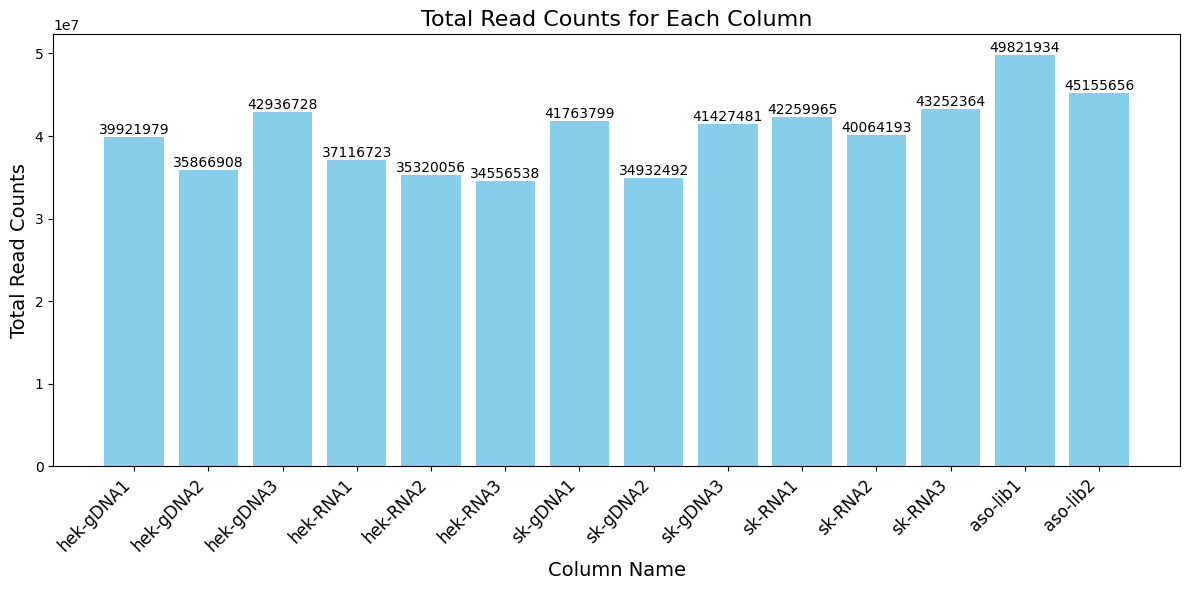

In [ ]:
import matplotlib.pyplot as plt

# Calculate total counts for each column
total_counts = []
column_names = counts.columns[2:16]  # Adjust index range to your data

for col in column_names:
    col_sum = counts[col].sum()
    total_counts.append(col_sum)

# Calculate the total counts of all the columns
overall_total = sum(total_counts)

# Print the total counts for each column
for col, col_sum in zip(column_names, total_counts):
    print(f"The total counts in {col} is {col_sum}")

print(f"The total counts across all columns is {overall_total}")

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(column_names, total_counts, color='skyblue')

# Add counts as text on the bars
for bar, count in zip(bars, total_counts):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{count}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.xlabel("Column Name", fontsize=14)
plt.ylabel("Total Read Counts", fontsize=14)
plt.title("Total Read Counts for Each Column", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

/home/yg2895/miniconda3/envs/python/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


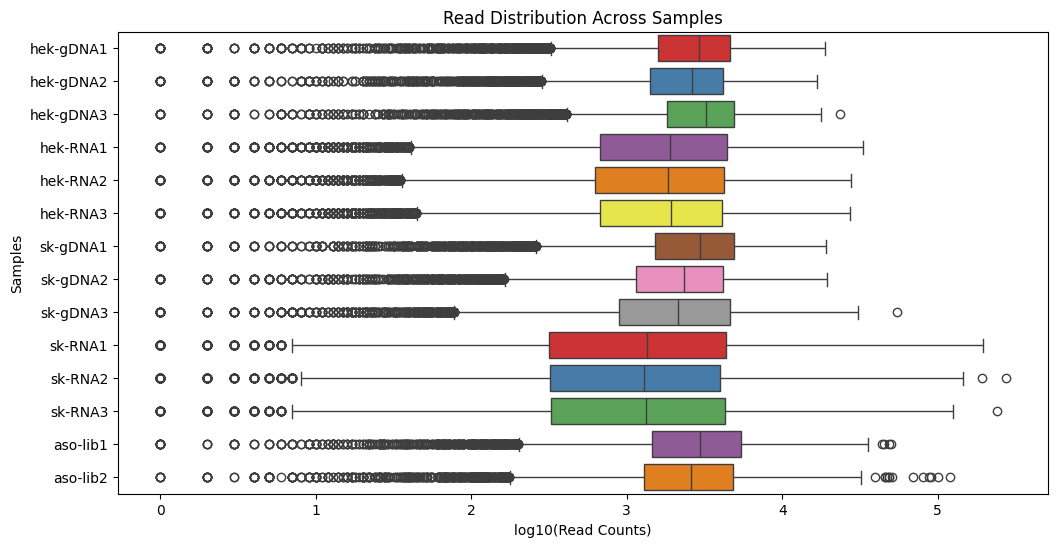

In [ ]:
# Step 2: Extract relevant columns (samples only)
samples_data = np.log10(counts.iloc[:, 2:])

# Step 3: Transpose data for plotting (each column as a sample)
samples_data_t = samples_data.T
# samples_data_t.columns = counts['Name']  # Optional: Use oligo names for clarity

# Step 4: Plot read distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=samples_data, orient="h", palette="Set1")
plt.title("Read Distribution Across Samples")
plt.xlabel("log10(Read Counts)")
plt.ylabel("Samples")
plt.show()

/home/yg2895/miniconda3/envs/python/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


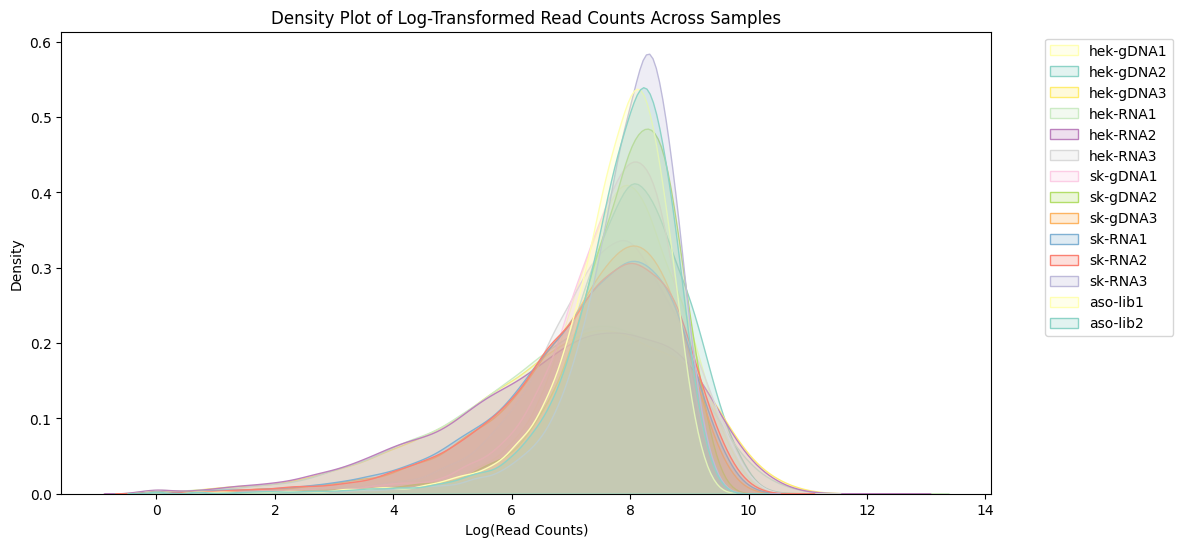

In [ ]:
# Step 2: Extract relevant columns (samples only)
samples_data = counts.iloc[:, 2:]

# Log-transform the counts
log_samples_data = np.log(samples_data)    #Add 1 ensures no issues with log(0)

# Additional density plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=log_samples_data, common_norm=False, fill=True, palette="Set3")
plt.title("Density Plot of Log-Transformed Read Counts Across Samples")
plt.xlabel("Log(Read Counts)")
plt.ylabel("Density")
plt.legend(log_samples_data.columns, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

###  Normalize the data

In [ ]:
import pandas as pd
import numpy as np

# Read the CSV file
counts = pd.read_csv('counts-aso.csv')

## Calculate log2 ratios
counts['hek_rd1'] = np.log2(counts['hek-RNA1'] / counts['hek-gDNA1'])
counts['hek_rd2'] = np.log2(counts['hek-RNA2'] / counts['hek-gDNA2'])
counts['hek_rd3'] = np.log2(counts['hek-RNA3'] / counts['hek-gDNA3'])
counts['sk_rd1'] = np.log2(counts['sk-RNA1'] / counts['sk-gDNA1'])
counts['sk_rd2'] = np.log2(counts['sk-RNA2'] / counts['sk-gDNA2'])
counts['sk_rd3'] = np.log2(counts['sk-RNA3'] / counts['sk-gDNA3'])

counts

/home/yg2895/miniconda3/envs/python/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/yg2895/miniconda3/envs/python/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/yg2895/miniconda3/envs/python/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/yg2895/miniconda3/envs/python/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/yg2895/miniconda3/envs/python/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home

,Seq,Name,hek-gDNA1,hek-gDNA2,hek-gDNA3,hek-RNA1,hek-RNA2,hek-RNA3,sk-gDNA1,sk-gDNA2,...,sk-RNA2,sk-RNA3,aso-lib1,aso-lib2,hek_rd1,hek_rd2,hek_rd3,sk_rd1,sk_rd2,sk_rd3
0,ATTATTCATACTAGGGTTTGACCAACAAAG,AAGAB|ENST00000261880.10|1,2931,2511,3964,2265,2164,2430,3041,2212,...,1599,2036,3000,2635,-0.371882,-0.214562,-0.706001,-0.873363,-0.468181,0.627387
1,TTAGTTTTTAGTAGGAGGTTAAGGAGAAAT,AAGAB|ENST00000261880.10|2,2201,1890,3436,2267,2269,2796,3213,2573,...,1828,1708,3358,2859,0.042625,0.263670,-0.297366,-0.764772,-0.493185,0.339349
2,TAAATCTCAGAGGTCTGTGTGATTTACTCA,AAGAB|ENST00000261880.10|3,4923,4555,6008,6560,6474,6490,6847,5955,...,3270,3675,7867,6851,0.414158,0.507206,0.111334,-0.972245,-0.864811,-0.718952
3,ATTTGGGTTTTCTCCATTCAAGGAGCTTGT,AAGAB|ENST00000261880.10|4,1870,1612,2527,1797,1965,2236,2174,1716,...,1300,1170,2041,1822,-0.057448,0.285678,-0.176505,-0.535389,-0.400538,-0.037728
4,GAAAATGCCTCTGGGCATTCTTTTGAAGTA,AAGAB|ENST00000261880.10|5,3262,2828,4033,2910,3202,3289,3404,2529,...,2280,2227,3110,2710,-0.164738,0.179191,-0.294204,-0.450506,-0.149533,0.097825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,GCTTGTGCAGTGTCCCCTCCCTCGGACCAA,STXBP1-frag-1821-win-221-mut-4,5356,4788,5157,729,594,567,3861,2694,...,151,129,3013,2613,-2.877165,-3.010888,-3.185111,-4.827296,-4.157129,-4.408206
11996,GCTTAAATGCTGTCCCCTCCCTCGGACCAA,STXBP1-frag-1821-win-241-mut-1,4122,3739,4213,649,563,550,2879,1880,...,164,175,2143,1795,-2.667054,-2.731446,-2.937344,-4.301528,-3.518965,-3.222981
11997,GCTTCCGATTTGTCCCCTCCCTCGGACCAA,STXBP1-frag-1821-win-241-mut-2,3925,3402,3986,693,577,552,2706,1768,...,136,166,1909,1679,-2.501765,-2.559740,-2.852202,-4.424666,-3.700440,-3.217418
11998,GCTTGTTCGATGTCCCCTCCCTCGGACCAA,STXBP1-frag-1821-win-241-mut-3,2646,2379,2778,735,606,616,1889,1309,...,361,382,1378,1167,-1.847997,-1.972966,-2.173044,-2.738749,-1.858394,-1.510034


In [ ]:
corr = counts.iloc[:, 16:19].corr()
print(corr)

          hek_rd1   hek_rd2   hek_rd3
hek_rd1  1.000000  0.983498  0.980844
hek_rd2  0.983498  1.000000  0.983474
hek_rd3  0.980844  0.983474  1.000000


11719
          hek_rd1  hek_rd2   hek_rd3
hek_rd1  1.000000  0.98734  0.984972
hek_rd2  0.987340  1.00000  0.989360
hek_rd3  0.984972  0.98936  1.000000


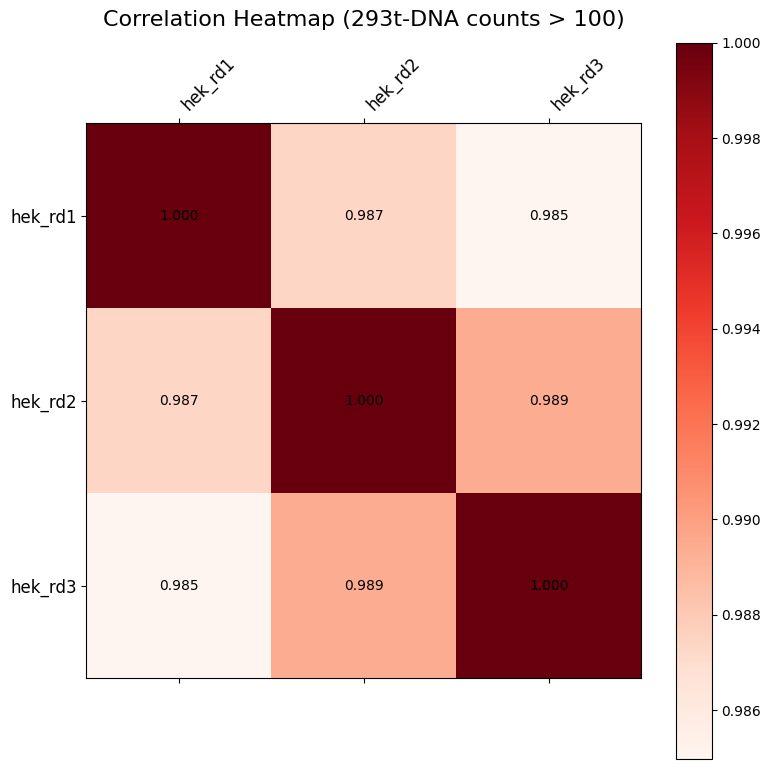

In [ ]:
## Filter 100

columns_to_check = counts.columns[2:5]

import numpy as np
import matplotlib.pyplot as plt

filtered_counts = counts[(counts[columns_to_check] > 100).all(axis=1)]

# # Calculate the mean for the specified columns
# counts['hek_gDNA_mean'] = counts[columns_to_check].mean(axis=1)

# # Filter rows where the mean of specified columns is >= 100
# filtered_counts = counts[counts['hek_gDNA_mean'] >= 100]

# Print the filtered rows
print(len(filtered_counts))

corr = filtered_counts.iloc[:, 16:19].corr()

print(corr)

# Plot the correlation heatmap
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(corr, cmap='Reds')

# Add color bar
plt.colorbar(cax)

# Add labels
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha="left", fontsize=12)
ax.set_yticklabels(corr.columns, fontsize=12)

# Annotate the heatmap with correlation values
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.3f}", ha='center', va='center', color='black', fontsize=10)

plt.title("Correlation Heatmap (293t-DNA counts > 100)", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

10872
          hek_rd1   hek_rd2   hek_rd3
hek_rd1  1.000000  0.988411  0.987085
hek_rd2  0.988411  1.000000  0.991811
hek_rd3  0.987085  0.991811  1.000000


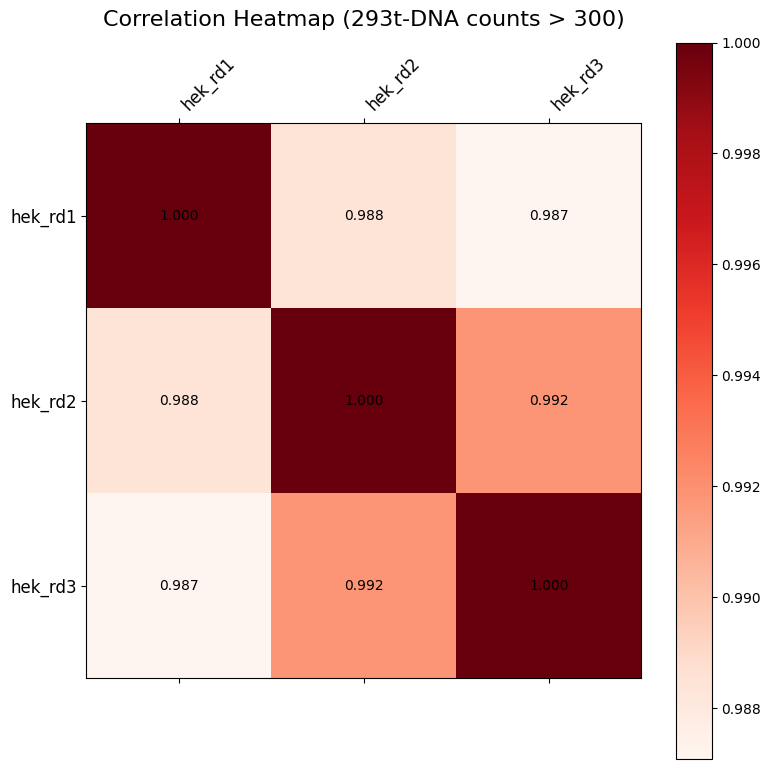

In [ ]:
## Filter 100

import numpy as np
import matplotlib.pyplot as plt

filtered_counts = counts[(counts[columns_to_check] > 300).all(axis=1)]

# Print the filtered rows
print(len(filtered_counts))

corr = filtered_counts.iloc[:, 16:19].corr()

print(corr)

# Plot the correlation heatmap
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(corr, cmap='Reds')

# Add color bar
plt.colorbar(cax)

# Add labels
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha="left", fontsize=12)
ax.set_yticklabels(corr.columns, fontsize=12)

# Annotate the heatmap with correlation values
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.3f}", ha='center', va='center', color='black', fontsize=10)

plt.title("Correlation Heatmap (293t-DNA counts > 300)", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

8621
          hek_rd1   hek_rd2   hek_rd3
hek_rd1  1.000000  0.987304  0.986486
hek_rd2  0.987304  1.000000  0.992210
hek_rd3  0.986486  0.992210  1.000000


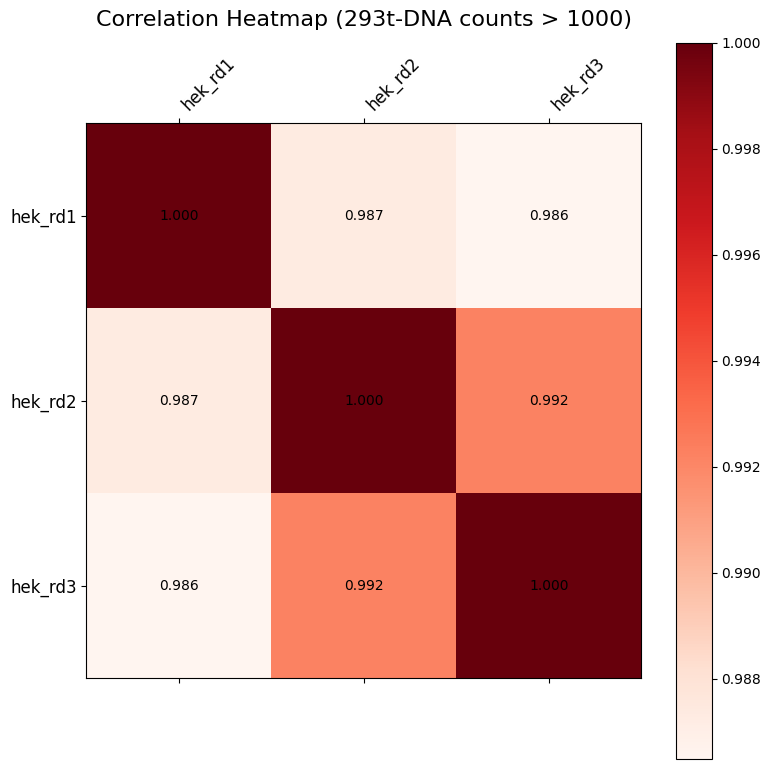

In [ ]:
## Filter 600

import numpy as np
import matplotlib.pyplot as plt

filtered_counts = counts[(counts[columns_to_check] > 1000).all(axis=1)]

# Print the filtered rows
print(len(filtered_counts))

corr = filtered_counts.iloc[:, 16:19].corr()

print(corr)

# Plot the correlation heatmap
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(corr, cmap='Reds')

# Add color bar
plt.colorbar(cax)

# Add labels
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha="left", fontsize=12)
ax.set_yticklabels(corr.columns, fontsize=12)

# Annotate the heatmap with correlation values
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.3f}", ha='center', va='center', color='black', fontsize=10)

plt.title("Correlation Heatmap (293t-DNA counts > 1000)", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

## For sk cells

11527
          sk_rd1    sk_rd2    sk_rd3
sk_rd1  1.000000  0.980500  0.927369
sk_rd2  0.980500  1.000000  0.956452
sk_rd3  0.927369  0.956452  1.000000


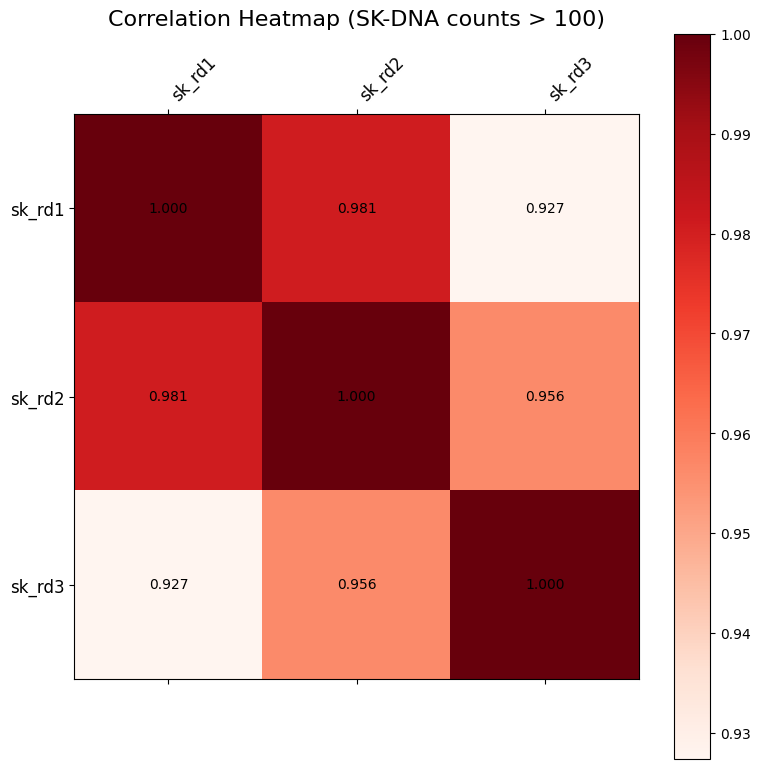

In [ ]:
## Filter 100

import numpy as np
import matplotlib.pyplot as plt

columns_to_check = counts.columns[8:11]
filtered_counts = counts[(counts[columns_to_check] > 100).all(axis=1)]

# Print the filtered rows
print(len(filtered_counts))

corr = filtered_counts.iloc[:, 19:22].corr()

print(corr)

# Plot the correlation heatmap
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(corr, cmap='Reds')

# Add color bar
plt.colorbar(cax)

# Add labels
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha="left", fontsize=12)
ax.set_yticklabels(corr.columns, fontsize=12)

# Annotate the heatmap with correlation values
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.3f}", ha='center', va='center', color='black', fontsize=10)

plt.title("Correlation Heatmap (SK-DNA counts > 100)", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

10872
          sk_rd1    sk_rd2    sk_rd3
sk_rd1  1.000000  0.984528  0.932660
sk_rd2  0.984528  1.000000  0.958442
sk_rd3  0.932660  0.958442  1.000000


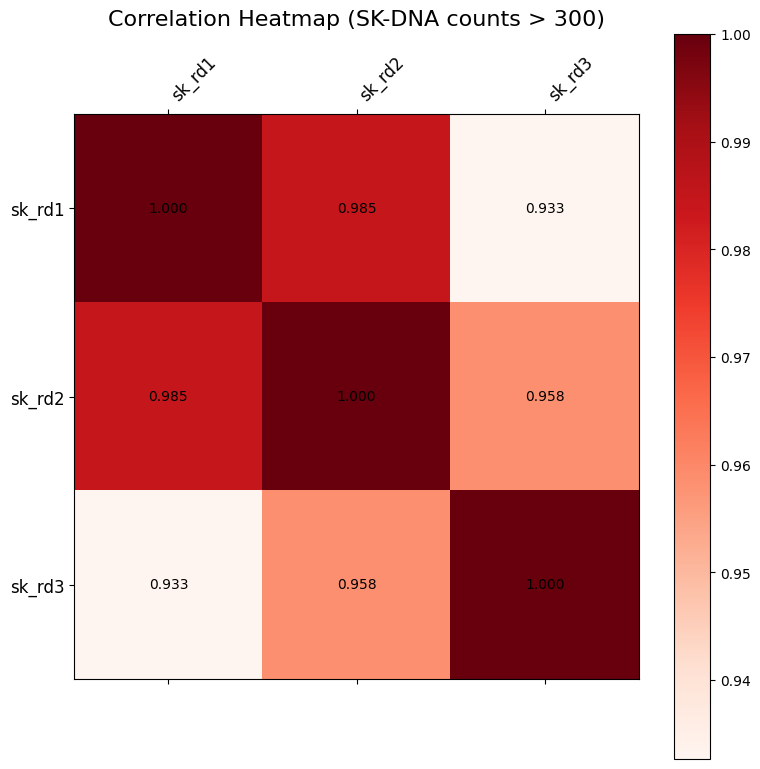

In [ ]:
## Filter 100

import numpy as np
import matplotlib.pyplot as plt

columns_to_check = counts.columns[8:11]
filtered_counts = counts[(counts[columns_to_check] > 300).all(axis=1)]

# Print the filtered rows
print(len(filtered_counts))

corr = filtered_counts.iloc[:, 19:22].corr()

print(corr)

# Plot the correlation heatmap
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(corr, cmap='Reds')

# Add color bar
plt.colorbar(cax)

# Add labels
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha="left", fontsize=12)
ax.set_yticklabels(corr.columns, fontsize=12)

# Annotate the heatmap with correlation values
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.3f}", ha='center', va='center', color='black', fontsize=10)

plt.title("Correlation Heatmap (SK-DNA counts > 300)", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

8621
          sk_rd1    sk_rd2    sk_rd3
sk_rd1  1.000000  0.989118  0.940513
sk_rd2  0.989118  1.000000  0.958767
sk_rd3  0.940513  0.958767  1.000000


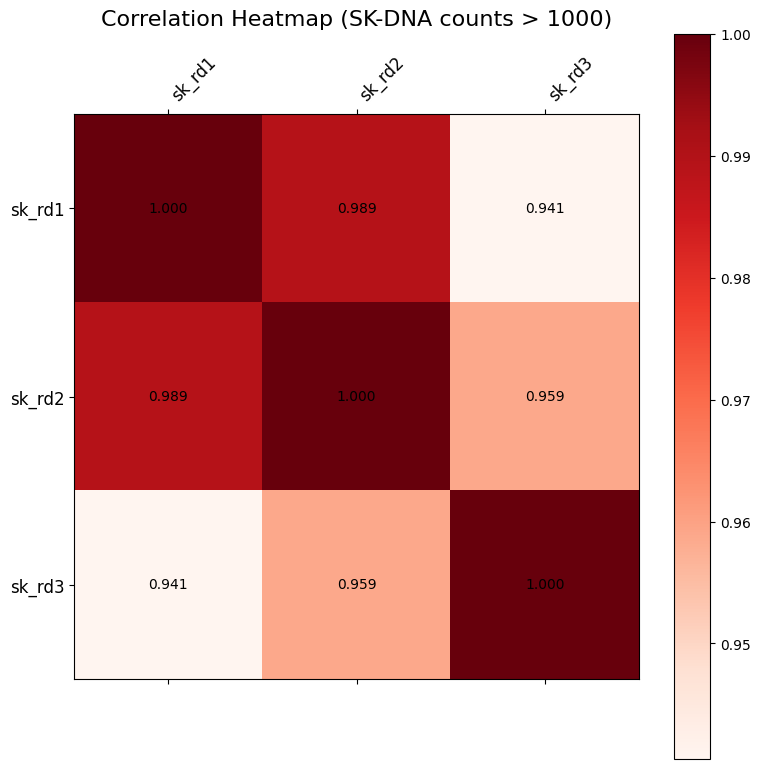

In [ ]:
## Filter 100

import numpy as np
import matplotlib.pyplot as plt

columns_to_check = counts.columns[8:11]
filtered_counts = counts[(counts[columns_to_check] > 1000).all(axis=1)]

# Print the filtered rows
print(len(filtered_counts))

corr = filtered_counts.iloc[:, 19:22].corr()

print(corr)

# Plot the correlation heatmap
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(corr, cmap='Reds')

# Add color bar
plt.colorbar(cax)

# Add labels
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha="left", fontsize=12)
ax.set_yticklabels(corr.columns, fontsize=12)

# Annotate the heatmap with correlation values
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.3f}", ha='center', va='center', color='black', fontsize=10)

plt.title("Correlation Heatmap (SK-DNA counts > 1000)", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

## Set up filters for the counts

11852


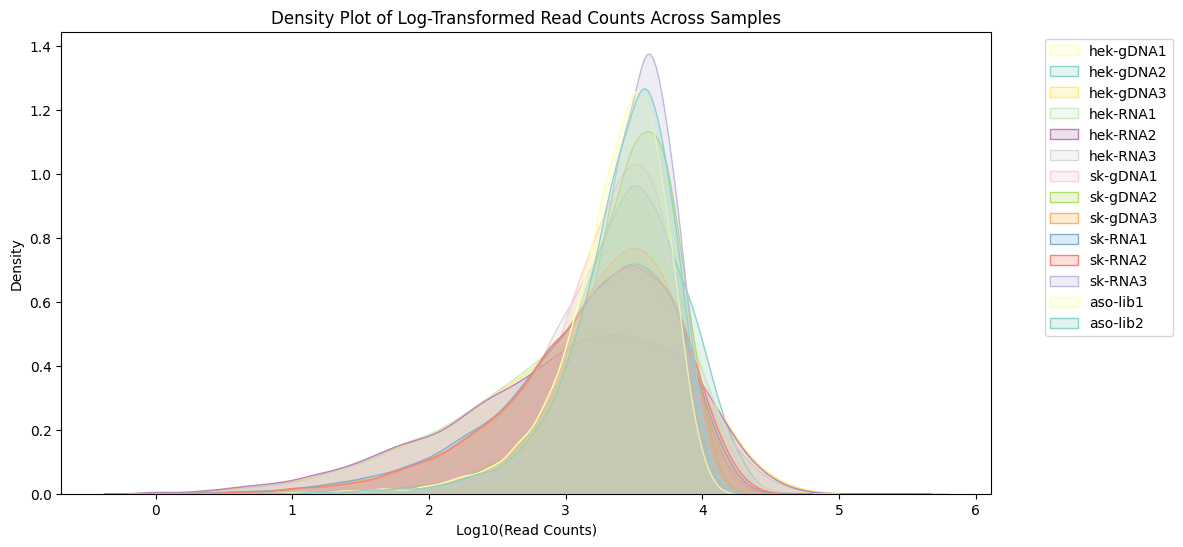

In [ ]:
## remove the rows with 0 counts
sample_data = counts.iloc[:, 2:]

data_filtered = sample_data[(sample_data > 0).all(axis=1)]
print(len(data_filtered))

# Log-transform the counts
log_data_filtered = np.log10(data_filtered)    

# Additional density plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=log_data_filtered, common_norm=False, fill=True, palette="Set3")
plt.title("Density Plot of Log-Transformed Read Counts Across Samples")
plt.xlabel("Log10(Read Counts)")
plt.ylabel("Density")
plt.legend(log_data_filtered.columns, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Step 1: Filter rows where all values > 0 for the relevant columns
sample_data = counts.iloc[:, 2:]

data_filtered = sample_data[(sample_data > 100).all(axis=1)]
data_filtered = data_filtered[(data_filtered < 100000).all(axis=1)]

# Step 2: Further filter rows where the sum of specific columns is >= 100
# data_filtered = data_filtered[data_filtered.iloc[:, 2:14].sum(axis=1) >= 100]

len(data_filtered)

10230

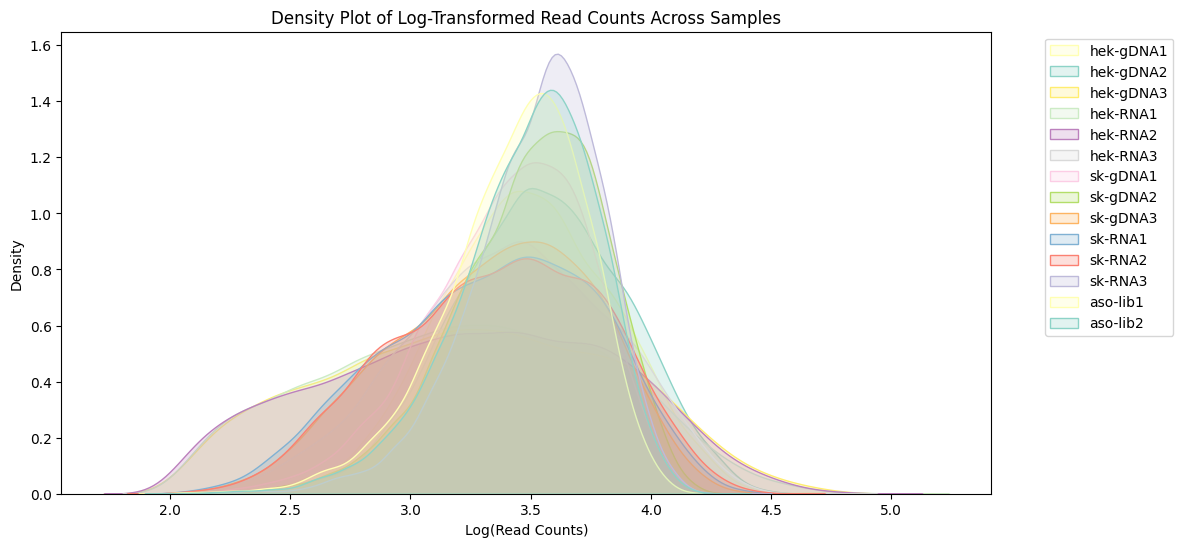

In [ ]:
# Log-transform the counts
log_data_filtered = np.log10(data_filtered)    

# Additional density plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=log_data_filtered, common_norm=False, fill=True, palette="Set3")
plt.title("Density Plot of Log-Transformed Read Counts Across Samples")
plt.xlabel("Log(Read Counts)")
plt.ylabel("Density")
plt.legend(log_data_filtered.columns, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Correlation

In [ ]:
for x in data_filtered.columns[0:14]:
    # print(x)
    data_filtered[x] = data_filtered[x]/sum(data_filtered[x])*10000000
print(data_filtered[0:3])

# correlation coefficient
corr = data_filtered.corr(method="pearson")
corr

# print(data_filtered.columns[2:16])

     hek-gDNA1    hek-gDNA2    hek-gDNA3     hek-RNA1     hek-RNA2  \
0   772.224291   736.415229   975.474686   615.779618   618.056345   
1   579.892755   554.291032   845.542639   616.323353   648.045215   
2  1297.052264  1335.870715  1478.469202  1783.450019  1849.028085   

      hek-RNA3     sk-gDNA1     sk-gDNA2     sk-gDNA3     sk-RNA1     sk-RNA2  \
0   710.651656   756.863697   654.816792   325.318021  401.498926  410.552983   
1   817.688079   799.672167   761.683366   333.216485  457.370162  469.350127   
2  1897.995576  1704.125529  1762.854428  1493.056682  844.115212  839.592405   

      sk-RNA3     aso-lib1     aso-lib2  
0  479.578506   623.798097   608.560452  
1  402.318315   698.238003   660.293865  
2  865.643914  1635.806543  1582.257176  


,hek-gDNA1,hek-gDNA2,hek-gDNA3,hek-RNA1,hek-RNA2,hek-RNA3,sk-gDNA1,sk-gDNA2,sk-gDNA3,sk-RNA1,sk-RNA2,sk-RNA3,aso-lib1,aso-lib2
hek-gDNA1,1.000000,0.997330,0.982290,0.687414,0.700969,0.709078,0.924367,0.880040,0.704138,0.522286,0.482981,0.499701,0.714222,0.666399
hek-gDNA2,0.997330,1.000000,0.977353,0.681370,0.693862,0.701696,0.917744,0.872816,0.698784,0.519138,0.479564,0.496260,0.707285,0.660771
hek-gDNA3,0.982290,0.977353,1.000000,0.669858,0.687285,0.705663,0.922716,0.872875,0.667727,0.496928,0.458168,0.471751,0.697750,0.648370
hek-RNA1,0.687414,0.681370,0.669858,1.000000,0.986824,0.980741,0.780341,0.797124,0.764868,0.853424,0.803302,0.856840,0.781419,0.758254
hek-RNA2,0.700969,0.693862,0.687285,0.986824,1.000000,0.995116,0.793020,0.805897,0.741299,0.851762,0.794327,0.838206,0.758284,0.733138
hek-RNA3,0.709078,0.701696,0.705663,0.980741,0.995116,1.000000,0.801765,0.811331,0.731402,0.842473,0.786117,0.825042,0.756241,0.732177
sk-gDNA1,0.924367,0.917744,0.922716,0.780341,0.793020,0.801765,1.000000,0.990461,0.860751,0.631245,0.588069,0.616601,0.878260,0.821660
sk-gDNA2,0.880040,0.872816,0.872875,0.797124,0.805897,0.811331,0.990461,1.000000,0.905530,0.660005,0.616798,0.650370,0.916451,0.859510
sk-gDNA3,0.704138,0.698784,0.667727,0.764868,0.741299,0.731402,0.860751,0.905530,1.000000,0.669680,0.645720,0.689431,0.974275,0.925433
sk-RNA1,0.522286,0.519138,0.496928,0.853424,0.851762,0.842473,0.631245,0.660005,0.669680,1.000000,0.979243,0.986076,0.714920,0.765706


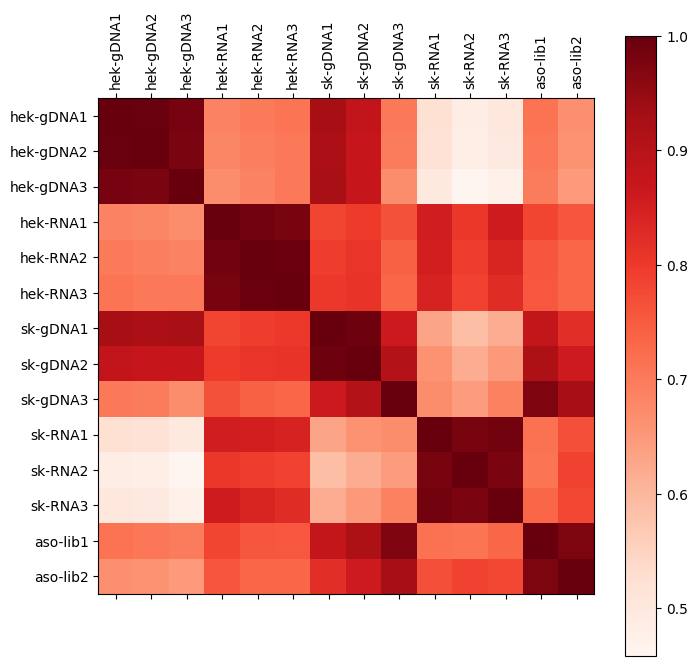

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='Reds', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()

## Correlation of RNA/DNA ratio

In [ ]:
import pandas as pd

counts = pd.read_csv('counts-aso.csv')
counts = counts.iloc[:,2:]
data_filtered = counts[(counts > 100).all(axis=1)]
data = data_filtered[(data_filtered < 100000).all(axis=1)]

In [ ]:
len(data)

10230

In [ ]:
data['hek-rd1'] = data['hek-RNA1']/data['hek-gDNA1']
data['hek-rd2'] = data['hek-RNA2']/data['hek-gDNA2']
data['hek-rd3'] = data['hek-RNA3']/data['hek-gDNA3']
data['sk-rd1'] = data['sk-RNA1']/data['sk-gDNA1']
data['sk-rd2'] = data['sk-RNA2']/data['sk-gDNA2']
data['sk-rd3'] = data['sk-RNA3']/data['sk-gDNA3']

/tmp/ipykernel_2811261/1412814745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hek-rd1'] = data['hek-RNA1']/data['hek-gDNA1']
/tmp/ipykernel_2811261/1412814745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hek-rd2'] = data['hek-RNA2']/data['hek-gDNA2']
/tmp/ipykernel_2811261/1412814745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [ ]:
data.head()

,hek-gDNA1,hek-gDNA2,hek-gDNA3,hek-RNA1,hek-RNA2,hek-RNA3,sk-gDNA1,sk-gDNA2,sk-gDNA3,sk-RNA1,sk-RNA2,sk-RNA3,aso-lib1,aso-lib2,hek-rd1,hek-rd2,hek-rd3,sk-rd1,sk-rd2,sk-rd3
0,2931,2511,3964,2265,2164,2430,3041,2212,1318,1660,1599,2036,3000,2635,0.772774,0.861808,0.613017,0.545873,0.722875,1.544765
1,2201,1890,3436,2267,2269,2796,3213,2573,1350,1891,1828,1708,3358,2859,1.029986,1.200529,0.813737,0.588547,0.710455,1.265185
2,4923,4555,6008,6560,6474,6490,6847,5955,6049,3490,3270,3675,7867,6851,1.332521,1.421295,1.080226,0.509712,0.549118,0.607538
3,1870,1612,2527,1797,1965,2236,2174,1716,1201,1500,1300,1170,2041,1822,0.960963,1.218983,0.884844,0.689972,0.757576,0.974188
4,3262,2828,4033,2910,3202,3289,3404,2529,2081,2491,2280,2227,3110,2710,0.892091,1.132249,0.815522,0.731786,0.901542,1.070159


In [ ]:
# print(counts.head())
counts_rd = (data.iloc[:,14:20])
# counts_rd.head()
corr = counts_rd.corr(method="pearson")
corr

,hek-rd1,hek-rd2,hek-rd3,sk-rd1,sk-rd2,sk-rd3
hek-rd1,1.000000,0.968982,0.968838,0.543775,0.320121,0.359713
hek-rd2,0.968982,1.000000,0.970766,0.544032,0.317136,0.365866
hek-rd3,0.968838,0.970766,1.000000,0.582251,0.351583,0.383548
sk-rd1,0.543775,0.544032,0.582251,1.000000,0.915249,0.873321
sk-rd2,0.320121,0.317136,0.351583,0.915249,1.000000,0.946054
sk-rd3,0.359713,0.365866,0.383548,0.873321,0.946054,1.000000


In [ ]:
import numpy as np

## Get log of the counts
counts_rd = np.log(data.iloc[:,14:20])
# counts_rd.head()
corr = counts_rd.corr(method="pearson")
corr

,hek-rd1,hek-rd2,hek-rd3,sk-rd1,sk-rd2,sk-rd3
hek-rd1,1.000000,0.981288,0.979982,0.873013,0.849105,0.795767
hek-rd2,0.981288,1.000000,0.987484,0.868751,0.831229,0.774125
hek-rd3,0.979982,0.987484,1.000000,0.893224,0.854358,0.781786
sk-rd1,0.873013,0.868751,0.893224,1.000000,0.977796,0.893820
sk-rd2,0.849105,0.831229,0.854358,0.977796,1.000000,0.936284
sk-rd3,0.795767,0.774125,0.781786,0.893820,0.936284,1.000000


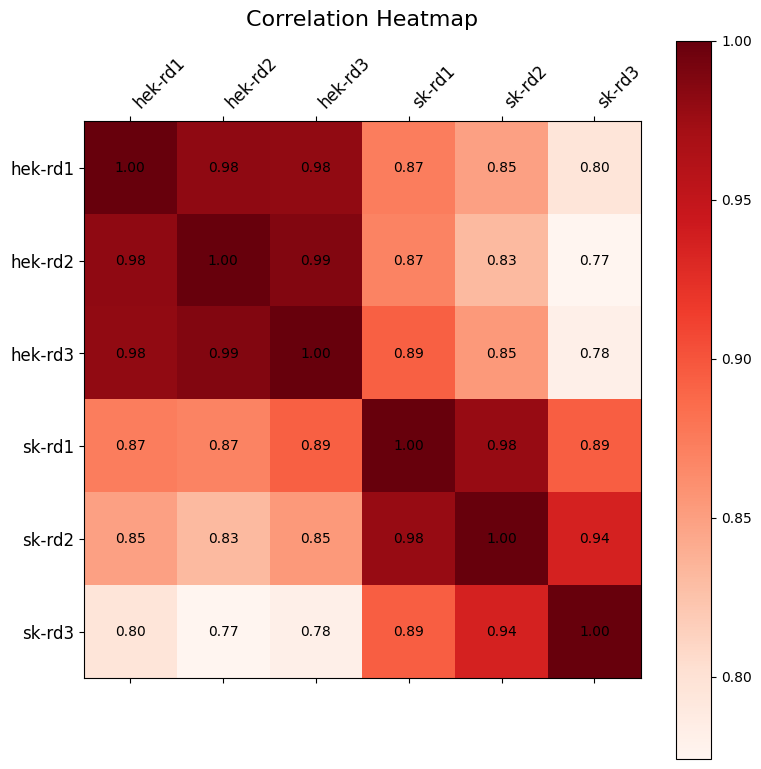

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the correlation heatmap
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.matshow(corr, cmap='Reds')

# Add color bar
plt.colorbar(cax)

# Add labels
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45, ha="left", fontsize=12)
ax.set_yticklabels(corr.columns, fontsize=12)

# Annotate the heatmap with correlation values
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='black', fontsize=10)

plt.title("Correlation Heatmap", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [ ]:
counts = pd.read_csv('counts-aso.csv')
counts = counts.iloc[:,2:]
counts = counts[(counts > 100).all(axis=1)]
counts = counts[(counts < 100000).all(axis=1)]

    hek-gDNA1   hek-gDNA2   hek-gDNA3    hek-RNA1    hek-RNA2    hek-RNA3  \
0   77.222429   73.641523   97.547469   61.577962   61.805634   71.065166   
1   57.989275   55.429103   84.554264   61.632335   64.804522   81.768808   
2  129.705226  133.587072  147.846920  178.345002  184.902808  189.799558   

     sk-gDNA1    sk-gDNA2    sk-gDNA3    sk-RNA1    sk-RNA2    sk-RNA3  \
0   75.686370   65.481679   32.531802  40.149893  41.055298  47.957851   
1   79.967217   76.168337   33.321649  45.737016  46.935013  40.231831   
2  170.412553  176.285443  149.305668  84.411521  83.959240  86.564391   

     aso-lib1    aso-lib2  
0   62.379810   60.856045  
1   69.823800   66.029386  
2  163.580654  158.225718  


/tmp/ipykernel_1173592/259857899.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[x] = data_filtered[x]/sum(data_filtered[x])*1000000


In [ ]:
len(counts)

10230

In [ ]:
counts['hek-rd1'] = counts['hek-RNA1']/counts['hek-gDNA1']
counts['hek-rd2'] = counts['hek-RNA2']/counts['hek-gDNA2']
counts['hek-rd3'] = counts['hek-RNA3']/counts['hek-gDNA3']
counts['sk-rd1'] = counts['sk-RNA1']/counts['sk-gDNA1']
counts['sk-rd2'] = counts['sk-RNA2']/counts['sk-gDNA2']
counts['sk-rd3'] = counts['sk-RNA3']/counts['sk-gDNA3']

In [ ]:
counts.head()

,hek-gDNA1,hek-gDNA2,hek-gDNA3,hek-RNA1,hek-RNA2,hek-RNA3,sk-gDNA1,sk-gDNA2,sk-gDNA3,sk-RNA1,sk-RNA2,sk-RNA3,aso-lib1,aso-lib2,hek-rd1,hek-rd2,hek-rd3,sk-rd1,sk-rd2,sk-rd3
0,2931,2511,3964,2265,2164,2430,3041,2212,1318,1660,1599,2036,3000,2635,0.772774,0.861808,0.613017,0.545873,0.722875,1.544765
1,2201,1890,3436,2267,2269,2796,3213,2573,1350,1891,1828,1708,3358,2859,1.029986,1.200529,0.813737,0.588547,0.710455,1.265185
2,4923,4555,6008,6560,6474,6490,6847,5955,6049,3490,3270,3675,7867,6851,1.332521,1.421295,1.080226,0.509712,0.549118,0.607538
3,1870,1612,2527,1797,1965,2236,2174,1716,1201,1500,1300,1170,2041,1822,0.960963,1.218983,0.884844,0.689972,0.757576,0.974188
4,3262,2828,4033,2910,3202,3289,3404,2529,2081,2491,2280,2227,3110,2710,0.892091,1.132249,0.815522,0.731786,0.901542,1.070159


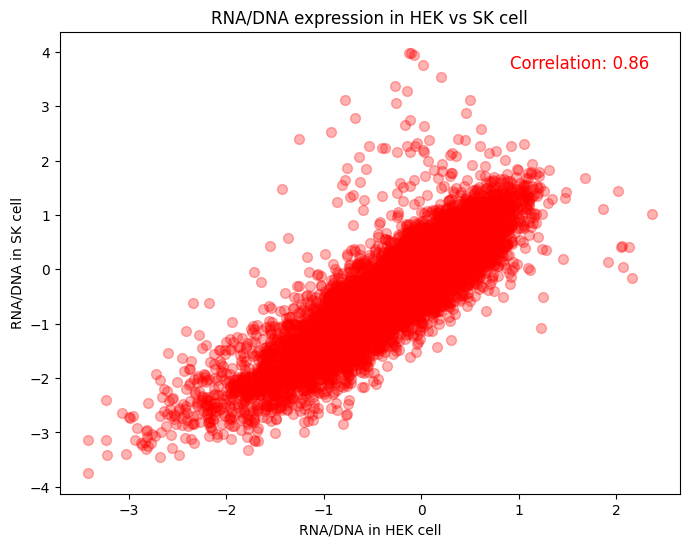

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Calculate the average expression values
hek_avg = counts[['hek-rd1', 'hek-rd2', 'hek-rd3']].mean(axis=1)
sk_avg = counts[['sk-rd1', 'sk-rd2', 'sk-rd3']].mean(axis=1)

# Remove rows with NaN values
hek_avg = hek_avg.replace([np.inf, -np.inf], np.nan).dropna()
sk_avg = sk_avg.replace([np.inf, -np.inf], np.nan).dropna()

# Calculate the correlation coefficient between hek_avg and sk_avg
correlation_score = np.corrcoef(np.log(hek_avg), np.log(sk_avg))[0, 1]

# Plotting the scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot between average hek_rd and sk_rd
plt.scatter(np.log(hek_avg), np.log(sk_avg), label=f'Correlation: {correlation_score:.2f}', s=50, alpha=0.3, color='red')

# Adding title, labels, and grid
plt.title('RNA/DNA expression in HEK vs SK cell')
plt.xlabel('RNA/DNA in HEK cell')
plt.ylabel('RNA/DNA in SK cell')

# Show correlation score as annotation on the plot (top-right corner)
plt.text(0.95, 0.95, f'Correlation: {correlation_score:.2f}', 
         ha='right', va='top', transform=plt.gca().transAxes, 
         fontsize=12, color='red')

plt.show()

## Correlaiton between RNA and DNA

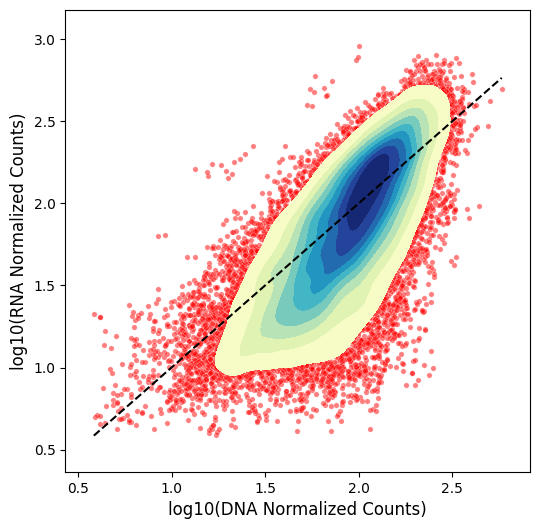

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Load data
counts = pd.read_csv('counts_norm.csv')

# Compute log-transformed values for each replicate (avoid log(0) issues)
for col in ["hek-gDNA1", "hek-gDNA2", "hek-gDNA3", "hek-RNA1", "hek-RNA2", "hek-RNA3"]:
    counts[f'log_{col}'] = np.log10(counts[col] + 1)

# Perform Mann-Whitney U-test per row using all three replicates
def compute_significance(row):
    dna_replicates = [row["log_hek-gDNA1"], row["log_hek-gDNA2"], row["log_hek-gDNA3"]]
    rna_replicates = [row["log_hek-RNA1"], row["log_hek-RNA2"], row["log_hek-RNA3"]]
    
    u_stat, p_val = mannwhitneyu(dna_replicates, rna_replicates, alternative='two-sided')
    return p_val  # Return the p-value for later thresholding

# Apply U-test and mark significance
counts['p_value'] = counts.apply(compute_significance, axis=1)
counts['significant'] = counts['p_value'] < 0.05  # True if p < 0.05

# Compute correlation coefficient using all replicates as flattened arrays
logDNA_all = counts[['log_hek-gDNA1', 'log_hek-gDNA2', 'log_hek-gDNA3']].values.flatten()
logRNA_all = counts[['log_hek-RNA1', 'log_hek-RNA2', 'log_hek-RNA3']].values.flatten()
correlation = np.corrcoef(logDNA_all, logRNA_all)[0, 1]

plt.figure(figsize=(6,6))

# Scatter plot of DNA vs. RNA with KDE density plot overlay
sns.scatterplot(x=logDNA_all, y=logRNA_all, color='red', alpha=0.5, s=15)  # Scatter with transparency
sns.kdeplot(x=logDNA_all, y=logRNA_all, cmap='YlGnBu', fill=True, thresh=0.1)  # KDE plot

# Add line of equality (x = y)
plt.plot([min(logDNA_all), max(logDNA_all)], [min(logDNA_all), max(logDNA_all)], linestyle="--", color="black")

# Labels and title
plt.xlabel("log10(DNA Normalized Counts)", fontsize=12)
plt.ylabel("log10(RNA Normalized Counts)", fontsize=12)

plt.show()

P-value for Mann-Whitney U-test comparing DNA vs RNA: 2.574e-193
Trend Line (y=0.97x + 0.03)


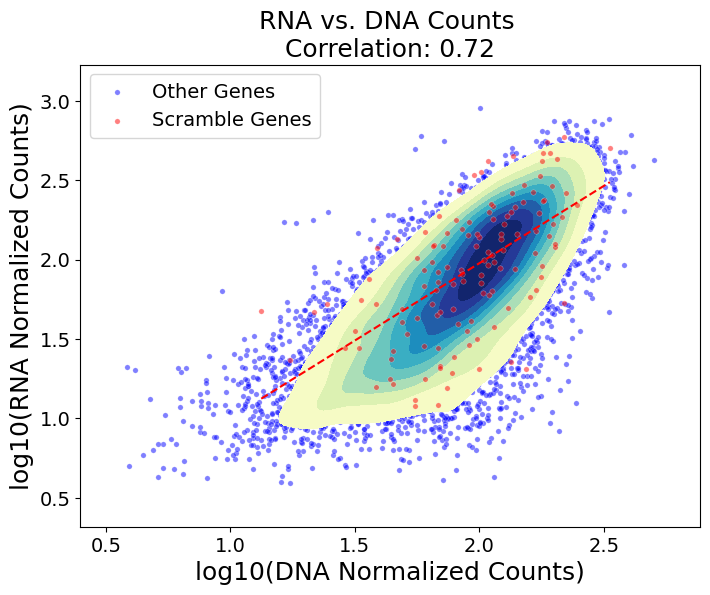

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Load data
counts = pd.read_csv('counts_norm.csv')

# Compute log-transformed values for each replicate (avoid log(0) issues)
for col in ["hek-gDNA1", "hek-gDNA2", "hek-gDNA3", "hek-RNA1", "hek-RNA2", "hek-RNA3"]:
    counts[f'log_{col}'] = np.log10(counts[col] + 1)


# Compute correlation coefficient using all replicates as flattened arrays
logDNA_all = counts[['log_hek-gDNA1', 'log_hek-gDNA2', 'log_hek-gDNA3']].values.flatten()
logRNA_all = counts[['log_hek-RNA1', 'log_hek-RNA2', 'log_hek-RNA3']].values.flatten()
correlation = np.corrcoef(logDNA_all, logRNA_all)[0, 1]


# Perform the Mann-Whitney U-test between the DNA and RNA groups
u_stat, p_val = mannwhitneyu(logDNA_all, logRNA_all, alternative='two-sided')
print(f"P-value for Mann-Whitney U-test comparing DNA vs RNA: {p_val:.3e}")

# Extract rows with "scramble" in the Name column
scramble_counts = counts[counts['Name'].str.contains("scramble", case=False, na=False)]
non_scramble_counts = counts[~counts['Name'].str.contains("scramble", case=False, na=False)]

# Scatter plot with density
plt.figure(figsize=(8, 6))
sns.scatterplot(x=non_scramble_counts['log_hek-gDNA1'], y=non_scramble_counts['log_hek-RNA1'], color='blue', alpha=0.5, s=15, label='Other Genes')
sns.kdeplot(x=non_scramble_counts['log_hek-gDNA1'], y=non_scramble_counts['log_hek-RNA1'], cmap='YlGnBu', fill=True, thresh=0.1)
sns.scatterplot(x=scramble_counts['log_hek-gDNA1'], y=scramble_counts['log_hek-RNA1'], color='red', alpha=0.5, s=15,label='Scramble Genes')

# Fit and plot a trend line for scramble genes
if not scramble_counts.empty:
    m, b = np.polyfit(scramble_counts['log_hek-gDNA1'], scramble_counts['log_hek-RNA1'], 1)
    x_vals = np.linspace(scramble_counts['log_hek-gDNA1'].min(), scramble_counts['log_hek-gDNA1'].max(), 100)
    y_vals = m * x_vals + b
    plt.plot(x_vals, y_vals, color='red', linestyle='--')

print(f'Trend Line (y={m:.2f}x + {b:.2f})')

# Labels and legend
plt.xlabel("log10(DNA Normalized Counts)", fontsize=18)
plt.ylabel("log10(RNA Normalized Counts)", fontsize=18)
plt.title(f'RNA vs. DNA Counts \nCorrelation: {correlation:.2f}',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

P-value for Mann-Whitney U-test comparing DNA vs RNA: 0.000e+00
Trend Line (y=1.46x + -1.02)


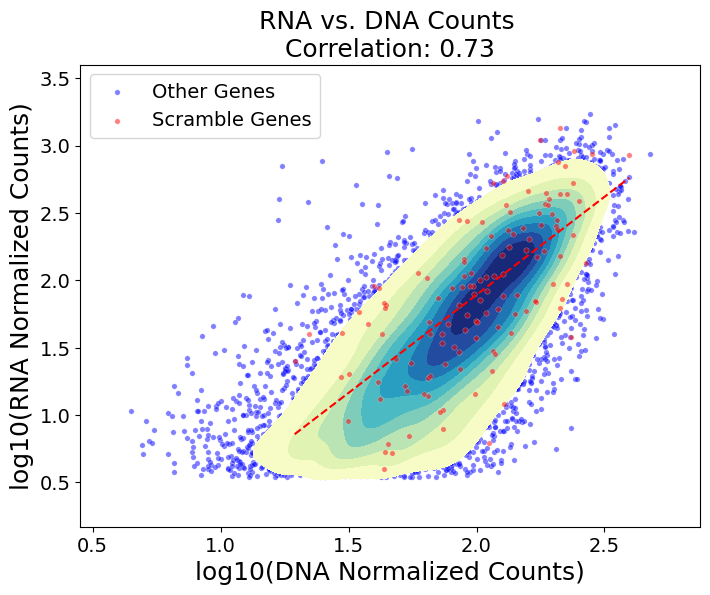

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

# Load data
counts = pd.read_csv('counts_norm.csv')

# Compute log-transformed values for each replicate (avoid log(0) issues)
for col in ["sk-gDNA1", "sk-gDNA2", "sk-gDNA3", "sk-RNA1", "sk-RNA2", "sk-RNA3"]:
    counts[f'log_{col}'] = np.log10(counts[col] + 1)

# Compute correlation coefficient using all replicates as flattened arrays
logDNA_all = counts[['log_sk-gDNA1', 'log_sk-gDNA2', 'log_sk-gDNA3']].values.flatten()
logRNA_all = counts[['log_sk-RNA1', 'log_sk-RNA2', 'log_sk-RNA3']].values.flatten()
correlation = np.corrcoef(logDNA_all, logRNA_all)[0, 1]

# Perform the Mann-Whitney U-test between the DNA and RNA groups
u_stat, p_val = mannwhitneyu(logDNA_all, logRNA_all, alternative='two-sided')
print(f"P-value for Mann-Whitney U-test comparing DNA vs RNA: {p_val:.3e}")

# Extract rows with "scramble" in the Name column
scramble_counts = counts[counts['Name'].str.contains("scramble", case=False, na=False)]
non_scramble_counts = counts[~counts['Name'].str.contains("scramble", case=False, na=False)]

# Scatter plot with density
plt.figure(figsize=(8, 6))
sns.scatterplot(x=non_scramble_counts['log_sk-gDNA1'], y=non_scramble_counts['log_sk-RNA1'], color='blue', alpha=0.5, s=15, label='Other Genes')
sns.kdeplot(x=non_scramble_counts['log_sk-gDNA1'], y=non_scramble_counts['log_sk-RNA1'], cmap='YlGnBu', fill=True, thresh=0.1)
sns.scatterplot(x=scramble_counts['log_sk-gDNA1'], y=scramble_counts['log_sk-RNA1'], color='red', alpha=0.5, s=15,label='Scramble Genes')

# Fit and plot a trend line for scramble genes
if not scramble_counts.empty:
    m, b = np.polyfit(scramble_counts['log_sk-gDNA1'], scramble_counts['log_sk-RNA1'], 1)
    x_vals = np.linspace(scramble_counts['log_sk-gDNA1'].min(), scramble_counts['log_sk-gDNA1'].max(), 100)
    y_vals = m * x_vals + b
    plt.plot(x_vals, y_vals, color='red', linestyle='--')

print(f'Trend Line (y={m:.2f}x + {b:.2f})')

# Labels and legend
plt.xlabel("log10(DNA Normalized Counts)", fontsize=18)
plt.ylabel("log10(RNA Normalized Counts)", fontsize=18)
plt.title(f'RNA vs. DNA Counts \nCorrelation: {correlation:.2f}',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

## Correlation Between HEK293T and SK cells 
- Use log2FC with 100 filter

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.colors as mcolors

# Load data
counts_hek = pd.read_csv('/home/yg2895/media/protein/yg2895/ASO-lib-20250102/DE_analyse/filerted_hek_df100.csv') 
counts_sk = pd.read_csv('/home/yg2895/media/protein/yg2895/ASO-lib-20250102/DE_analyse/filerted_sk_df100.csv') 

# Merge data on a common column (e.g., "gene" if available)
df = pd.merge(counts_hek, counts_sk, on="Name", suffixes=("_hek", "_sk"))

# Create DataFrame with required columns
df = df[['Name','log2FoldChange_hek', 'log2FoldChange_sk', 'padj_hek', 'padj_sk']].copy()
df.rename(columns={'log2FoldChange_hek': 'HEK log2FC', 'log2FoldChange_sk': 'SK log2FC', 
                   'padj_hek': 'p_value_hek', 'padj_sk': 'p_value_sk'}, inplace=True)

# Handle p-values (e.g., take the minimum of both cell lines)
df['p_value'] = df[['p_value_hek', 'p_value_sk']].min(axis=1)
df['p_value'] = df['p_value'].replace(0, 1e-300)  # Prevent log(0) error
df['log10_pvalue'] = -np.log10(df['p_value'])  # Convert to log scale

# Compute Pearson correlation
df_clean = df.dropna(subset=['HEK log2FC', 'SK log2FC'])  # Ensure no NaN values
corr, pval = pearsonr(df_clean['HEK log2FC'], df_clean['SK log2FC'])
print(f"Pearson correlation: {corr:.3f}, p-value: {pval:.3e}")

Pearson correlation: 0.903, p-value: 0.000e+00


                               Name  HEK log2FC  SK log2FC  log10_pvalue
10906  ZNF462|ENST00000277225.10|13   -9.108482  -6.096422     89.474274
3301     FGF10|ENST00000264664.5|23   -8.000865  -5.596558    121.616183
6179      NFIA|ENST00000403491.8|20   -7.900417  -5.109068     19.451854
4945      KLF6|ENST00000497571.6|22   -6.998295  -4.123590    300.000000


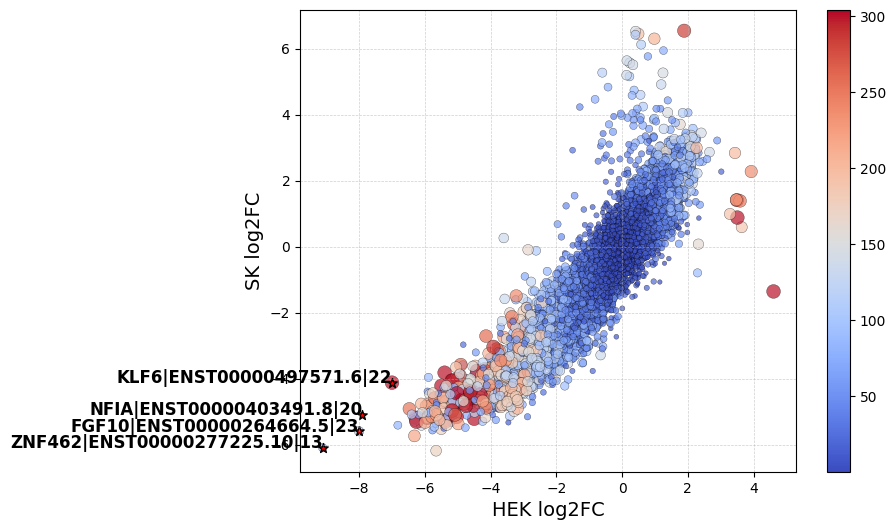

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Identify top 3 points with highest absolute log2FC values in either cell line
top1_smallest = df_clean.nsmallest(4, 'HEK log2FC')

# Print Name and log2FC values
print(top1_smallest[['Name', 'HEK log2FC', 'SK log2FC', 'log10_pvalue']])

plt.figure(figsize=(8, 6))

# Scatter plot
scatter = sns.scatterplot(
    x='HEK log2FC', 
    y='SK log2FC', 
    hue='log10_pvalue',  
    size='log10_pvalue',  
    sizes=(10, 100),  
    palette='coolwarm',  
    data=df_clean, 
    edgecolor='black',  
    alpha=0.7,  
    legend=False
)

# Highlight and annotate top 3 points with their names
for i, row in top1_smallest.iterrows():
    plt.scatter(row['HEK log2FC'], row['SK log2FC'], color='red', edgecolor='black', s=50, marker='*')
    plt.text(row['HEK log2FC'], row['SK log2FC'], row['Name'], fontsize=12, ha='right', color='black', weight='bold')

# Create ScalarMappable for color bar
norm = mcolors.Normalize(vmin=df_clean['log10_pvalue'].min(), vmax=df_clean['log10_pvalue'].max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])

# Get current axis and create color bar
ax = plt.gca()
cbar = plt.colorbar(sm, ax=ax)
# cbar.set_label('-log10(p-value)')

plt.xlabel('HEK log2FC', fontsize=14)
plt.ylabel('SK log2FC', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.show()


Pearson correlation: 0.903, p-value: 0.000e+00


AttributeError: 'Axes' object has no attribute 'legend_elements'

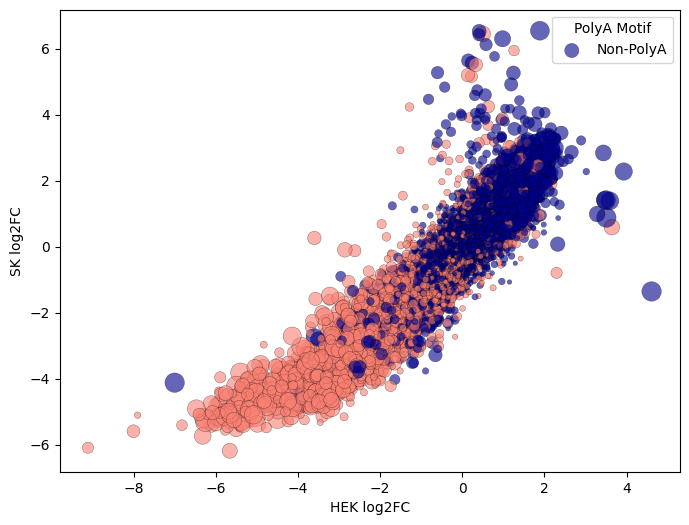

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.colors as mcolors

# Load data
counts_hek = pd.read_csv('/home/yg2895/media/protein/yg2895/ASO-lib-20250102/DE_analyse/filerted_hek_df100.csv') 
counts_sk = pd.read_csv('/home/yg2895/media/protein/yg2895/ASO-lib-20250102/DE_analyse/filerted_sk_df100.csv') 

# Merge data on a common column (e.g., "gene" if available)
df1 = pd.merge(counts_hek, counts_sk, on="Name", suffixes=("_hek", "_sk"))
df2 = pd.read_csv("/home/yg2895/media/protein/yg2895/ASO-lib-20250102/motif_analyse/haplo-utr3-oligo-pool.csv")

df = pd.merge(df1, df2, on='Name')

# Create DataFrame with required columns
df = df[['Name','Sequence','log2FoldChange_hek', 'log2FoldChange_sk', 'padj_hek', 'padj_sk']].copy()
df.rename(columns={'log2FoldChange_hek': 'HEK log2FC', 'log2FoldChange_sk': 'SK log2FC', 
                   'padj_hek': 'p_value_hek', 'padj_sk': 'p_value_sk'}, inplace=True)

# Handle p-values (e.g., take the minimum of both cell lines)
df['p_value'] = df[['p_value_hek', 'p_value_sk']].min(axis=1)
df['p_value'] = df['p_value'].replace(0, 1e-300)  # Prevent log(0) error
df['log10_pvalue'] = -np.log10(df['p_value'])  # Convert to log scale

# Compute Pearson correlation
df_clean = df.dropna(subset=['HEK log2FC', 'SK log2FC'])  # Ensure no NaN values
corr, pval = pearsonr(df_clean['HEK log2FC'], df_clean['SK log2FC'])
print(f"Pearson correlation: {corr:.3f}, p-value: {pval:.3e}")

# Identify genes with polyA motif (AATAAA or ATTAAA) in the Sequence column
df_clean['is_polyA'] = df_clean['Sequence'].str.contains('AATAAA|ATTAAA')

plt.figure(figsize=(8, 6))

# Scatter plot with color based on polyA and size based on log10_pvalue
scatter = sns.scatterplot(
    x='HEK log2FC', 
    y='SK log2FC', 
    hue='is_polyA',  # Color based on whether the gene is polyA or not
    size='log10_pvalue',  # Size reflects the log10 p-value
    sizes=(10, 200),  # Adjust the size range
    palette={True: 'salmon', False: 'darkblue'},  # PolyA genes in salmon, non-polyA in dark blue
    data=df_clean,  
    edgecolor='black',  
    alpha=0.6,  # Transparency for all points
    legend=False
)

# Create color bar for PolyA and Non-PolyA genes (hue)
plt.legend(title='PolyA Motif', loc='upper right', labels=['Non-PolyA', 'PolyA'])

# Create a size legend (based on the log10(p-value))
handles, _ = scatter.legend_elements("sizes", num_bins=5)
size_legend = plt.legend(handles=handles, title="log10(p-value)", loc='lower right')

# Add both the legends to the plot
plt.gca().add_artist(size_legend)

# Set labels and grid
plt.xlabel('HEK log2FC', fontsize=14)
plt.ylabel('SK log2FC', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)  # Make grid lines slightly transparent

# Display the plot
plt.show()


## Remove polyA 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.colors as mcolors

# Load data
counts_hek = pd.read_csv('/home/yg2895/media/protein/yg2895/ASO-lib-20250102/DE_analyse/fitered_no_polyA_hek.csv') 
counts_sk = pd.read_csv('/home/yg2895/media/protein/yg2895/ASO-lib-20250102/DE_analyse/fitered_no_polyA_sk.csv') 

# Merge data on a common column (e.g., "gene" if available)
df = pd.merge(counts_hek, counts_sk, on="Name", suffixes=("_hek", "_sk"))

# Create DataFrame with required columns
df = df[['Name','log2FoldChange_hek', 'log2FoldChange_sk', 'padj_hek', 'padj_sk']].copy()
df.rename(columns={'log2FoldChange_hek': 'HEK log2FC', 'log2FoldChange_sk': 'SK log2FC', 
                   'padj_hek': 'p_value_hek', 'padj_sk': 'p_value_sk'}, inplace=True)

# Replace p-value = 0 with a Smallest Possible Value



# Handle p-values (e.g., take the minimum of both cell lines)
df['p_value'] = df[['p_value_hek', 'p_value_sk']].min(axis=1)
df['p_value'] = df['p_value'].replace(0, 1e-300)  # Prevent log(0) error
df['log10_pvalue'] = -np.log10(df['p_value'])  # Convert to log scale

# Compute Pearson correlation
df_clean = df.dropna(subset=['HEK log2FC', 'SK log2FC'])  # Ensure no NaN values
corr, pval = pearsonr(df_clean['HEK log2FC'], df_clean['SK log2FC'])
print(f"Pearson correlation: {corr:.3f}, p-value: {pval:.3e}")

Pearson correlation: 0.832, p-value: 0.000e+00


                              Name  HEK log2FC  SK log2FC  log10_pvalue
6673   TOP3A|ENST00000321105.10|15    4.608582  -1.358707    300.000000
384        ATM|ENST00000675843.1|3    3.930004   2.276388    235.874827
3254     KIF1B|ENST00000676179.1|9    3.591351   1.387472    251.410055
801   CACNB2|ENST00000377329.10|15    3.507395   0.880768    300.000000
2009     EXT2|ENST00000533608.7|42    3.496347   1.409494    284.657405


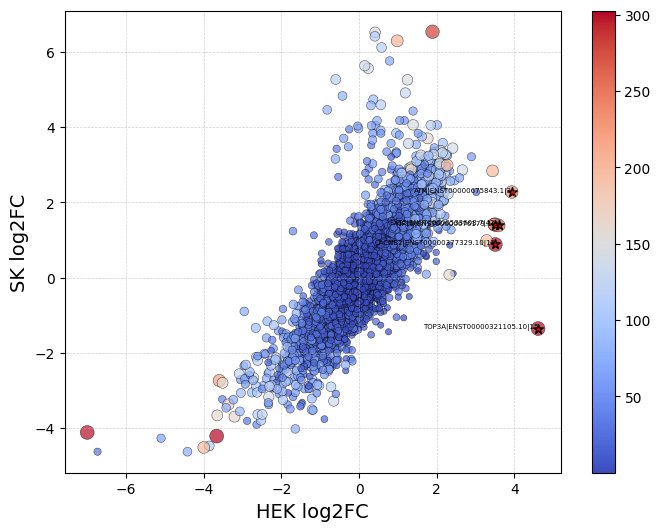

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Identify top 3 points with highest absolute log2FC values in either cell line
top1_smallest = df_clean.nlargest(5, 'HEK log2FC')

# Print Name and log2FC values
print(top1_smallest[['Name', 'HEK log2FC', 'SK log2FC', 'log10_pvalue']])

plt.figure(figsize=(8, 6))

# Scatter plot
scatter = sns.scatterplot(
    x='HEK log2FC', 
    y='SK log2FC', 
    hue='log10_pvalue',  
    size='log10_pvalue',  
    sizes=(20, 100),  
    palette='coolwarm',  
    data=df_clean, 
    edgecolor='black',  
    alpha=0.7,  
    legend=False
)

# Highlight and annotate top 3 points with their names
for i, row in top1_smallest.iterrows():
    plt.scatter(row['HEK log2FC'], row['SK log2FC'], color='red', edgecolor='black', s=50, marker='*')
    plt.text(row['HEK log2FC'], row['SK log2FC'], row['Name'], fontsize=5, ha='right', color='black')

# Create ScalarMappable for color bar
norm = mcolors.Normalize(vmin=df_clean['log10_pvalue'].min(), vmax=df_clean['log10_pvalue'].max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])

# Get current axis and create color bar
ax = plt.gca()
cbar = plt.colorbar(sm, ax=ax)
# cbar.set_label('-log10(p-value)')

plt.xlabel('HEK log2FC', fontsize=14)
plt.ylabel('SK log2FC', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.show()

In [ ]:
# Filter points where HEK log2FC < 1 and SK log2FC > 4
filtered_points = df_clean[(df_clean['HEK log2FC'] < 1) & (df_clean['SK log2FC'] > 3)]

# Print the selected points
print(filtered_points[['Name', 'HEK log2FC', 'SK log2FC', 'log10_pvalue']])
print(len(filtered_points))

                              Name  HEK log2FC  SK log2FC  log10_pvalue
122      AFF2|ENST00000370460.7|41    0.957078   3.343389     69.159914
172    ALDH1A2|ENST00000249750.9|2    0.426296   4.046381     67.603086
222      ANOS1|ENST00000262648.8|5   -0.426822   4.835375     78.190334
287    ARID1B|ENST00000636930.2|13    0.981550   6.301700    203.881206
381    ASXL3|ENST00000269197.12|32    0.462972   4.176017     73.679027
482    ATP8A2|ENST00000381655.7|26    0.555209   3.915238     83.704943
509     AUTS2|ENST00000342771.10|4    0.559947   4.600422    115.439913
562    BCL11B|ENST00000357195.8|18   -0.252957   3.945249     35.799808
636    BMPR2|ENST00000374580.10|48    0.366597   4.741734     89.051845
714       BUB3|ENST00000368865.9|8   -0.600949   5.274009    115.738779
1066      CHL1|ENST00000256509.7|7    0.313286   3.523343     32.119917
1087       CHM|ENST00000357749.7|8   -0.576827   3.427075     35.457648
1354  CSNK2A1|ENST00000217244.9|44    0.822264   3.571650     61